# Project for exam

## Data import

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('model.csv')

In [3]:
df.shape

(28000, 48)

In [4]:
df.sample(10)

age_days   n_tokens_title   n_tokens_review   n_unique_tokens  \
7315        595                9              1027          0.409674   
9843        451               12               891          0.473988   
7284        143               10              1203          0.489469   
15736       197               14               195          0.631579   
14429        66               15               259          0.559184   
18882       518               10               701          0.544787   
25841       204               14              1857          0.420993   
24209       438               10               291          0.591398   
4038        672                9               390          0.607692   
10216       381               11               269          0.622137   

        n_non_stop_words   n_non_stop_unique_tokens   num_hrefs  \
7315                 1.0                   0.615942          19   
9843                 1.0                   0.646520           6   
7284                 1.0                   0.745156           3   
15736                1.0                   0.761905          11   
14429                1.0                   0.684211           6   
18882                1.0                   0.718970          13   
25841                1.0                   0.515361         123   
24209                1.0                   0.769697           3   
4038                 1.0                   0.808511          14   
10216                1.0                   0.750000           8   

        num_self_hrefs   num_imgs   num_videos  ...   min_positive_polarity  \
7315                 0          1            0  ...                0.100000   
9843                 4          0           16  ...                0.050000   
7284                 1          3            0  ...                0.050000   
15736                1          1            9  ...                0.136364   
14429                4          0            2  ...                0.100000   
18882               10          5            1  ...                0.100000   
25841               26         49           26  ...                0.062500   
24209                2          1            0  ...                0.033333   
4038                 0          1            0  ...                0.100000   
10216                6          1            0  ...                0.050000   

        max_positive_polarity  avg_negative_polarity   min_negative_polarity  \
7315                     1.00              -0.292804                    -1.0   
9843                     0.80              -0.221186                    -0.4   
7284                     0.80              -0.389190                    -1.0   
15736                    1.00              -0.580000                    -0.7   
14429                    0.40              -0.338095                    -0.5   
18882                    0.90              -0.165123                    -0.4   
25841                    1.00              -0.306147                    -0.8   
24209                    0.75              -0.081250                    -0.1   
4038                     0.80              -0.305556                    -0.7   
10216                    0.50              -0.211111                    -0.3   

        max_negative_polarity   title_subjectivity   title_sentiment_polarity  \
7315                -0.125000             0.000000                   0.000000   
9843                -0.071429             0.000000                   0.000000   
7284                -0.100000             0.750000                   0.083333   
15736               -0.100000             1.000000                   1.000000   
14429               -0.214286             0.454545                   0.136364   
18882               -0.050000             0.000000                   0.000000   
25841               -0.050000             0.000000                   0.000000   
24209               -0.025000             0.333333                   0.250000

In [5]:
df.isnull().sum()

age_days                         0
 n_tokens_title                  0
 n_tokens_review                 0
 n_unique_tokens                 0
 n_non_stop_words                0
 n_non_stop_unique_tokens        0
 num_hrefs                       0
 num_self_hrefs                  0
 num_imgs                        0
 num_videos                      0
 average_token_length            0
 num_keywords                    0
product_category                 0
 kw_min_min                      0
 kw_max_min                      0
 kw_avg_min                      0
 kw_min_max                      0
 kw_max_max                      0
 kw_avg_max                      0
 kw_min_avg                      0
 kw_max_avg                      0
 kw_avg_avg                      0
 self_reference_min_shares       0
 self_reference_max_shares       0
 self_reference_avg_sharess      0
day                              0
topic_quality                    0
topic_shipping                   0
topic_packaging     

## Split categorical/continuos variables

In [6]:
df.columns

Index(['age_days', ' n_tokens_title', ' n_tokens_review', ' n_unique_tokens',
       ' n_non_stop_words', ' n_non_stop_unique_tokens', ' num_hrefs',
       ' num_self_hrefs', ' num_imgs', ' num_videos', ' average_token_length',
       ' num_keywords', 'product_category', ' kw_min_min', ' kw_max_min',
       ' kw_avg_min', ' kw_min_max', ' kw_max_max', ' kw_avg_max',
       ' kw_min_avg', ' kw_max_avg', ' kw_avg_avg',
       ' self_reference_min_shares', ' self_reference_max_shares',
       ' self_reference_avg_sharess', 'day', 'topic_quality', 'topic_shipping',
       'topic_packaging', 'topic_description', 'topic_others',
       ' global_subjectivity', ' global_sentiment_polarity',
       ' global_rate_positive_words', ' global_rate_negative_words',
       ' rate_positive_words', ' rate_negative_words',
       ' avg_positive_polarity', ' min_positive_polarity',
       ' max_positive_polarity', ' avg_negative_polarity',
       ' min_negative_polarity', ' max_negative_polarity',
       

In [7]:
df.dtypes

age_days                           int64
 n_tokens_title                    int64
 n_tokens_review                   int64
 n_unique_tokens                 float64
 n_non_stop_words                float64
 n_non_stop_unique_tokens        float64
 num_hrefs                         int64
 num_self_hrefs                    int64
 num_imgs                          int64
 num_videos                        int64
 average_token_length            float64
 num_keywords                      int64
product_category                  object
 kw_min_min                        int64
 kw_max_min                      float64
 kw_avg_min                      float64
 kw_min_max                        int64
 kw_max_max                        int64
 kw_avg_max                      float64
 kw_min_avg                      float64
 kw_max_avg                      float64
 kw_avg_avg                      float64
 self_reference_min_shares       float64
 self_reference_max_shares       float64
 self_reference_

In [8]:
df_categorical=df[['day', 'product_category']]
df_categorical.head()

day product_category
0   tuesday            sport
1    monday           travel
2  thursday           travel
3   tuesday           travel
4   tuesday             tech

In [9]:
df_numerical = df.select_dtypes(exclude=['object'])
df_numerical.head()

age_days   n_tokens_title   n_tokens_review   n_unique_tokens  \
0       436                9               532          0.462264   
1       185               16              1012          0.446247   
2       210               12               506          0.546559   
3       723               11               241          0.543933   
4       345               11               983          0.405930   

    n_non_stop_words   n_non_stop_unique_tokens   num_hrefs   num_self_hrefs  \
0                1.0                   0.594427           7                7   
1                1.0                   0.638112           4                2   
2                1.0                   0.693291           8                3   
3                1.0                   0.648649           5                4   
4                1.0                   0.594747          11                7   

    num_imgs   num_videos  ...   min_positive_polarity  \
0          1            0  ...                0.136364   
1          3           11  ...                0.100000   
2          2            1  ...                0.050000   
3          1            1  ...                0.136364   
4          1            1  ...                0.100000   

    max_positive_polarity   avg_negative_polarity   min_negative_polarity  \
0                     1.0               -0.180556                   -0.25   
1                     0.9               -0.318981                   -1.00   
2                     0.5               -0.292708                   -0.75   
3                     0.7                0.000000                    0.00   
4                     1.0               -0.256481                   -0.80   

    max_negative_polarity   title_subjectivity   title_sentiment_polarity  \
0                  -0.125                 0.50                      0.500   
1                  -0.050                 0.05                     -0.075   
2                  -0.100                 0.00                      0.000   
3                   0.000                 0.00                      0.000   
4                  -0.050                 0.00                      0.000   

    abs_title_subjectivity   abs_title_sentiment_polarity   shares  
0                     0.00                          0.500     2200  
1                     0.45                          0.075      816  
2                     0.50                          0.000     1000  
3                     0.50                          0.000      660  
4                     0.50                          0.000     1000  

[5 rows x 46 columns]

## Categorical data

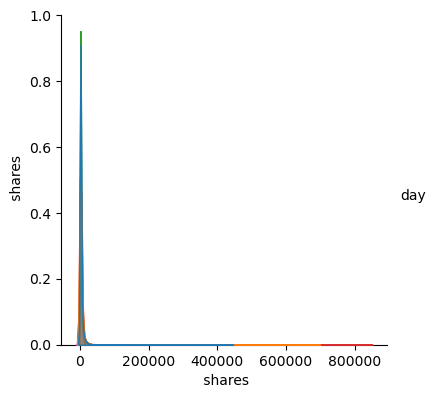

In [10]:
sns.pairplot(data=df[["day"," shares"]], hue="day", height=4)

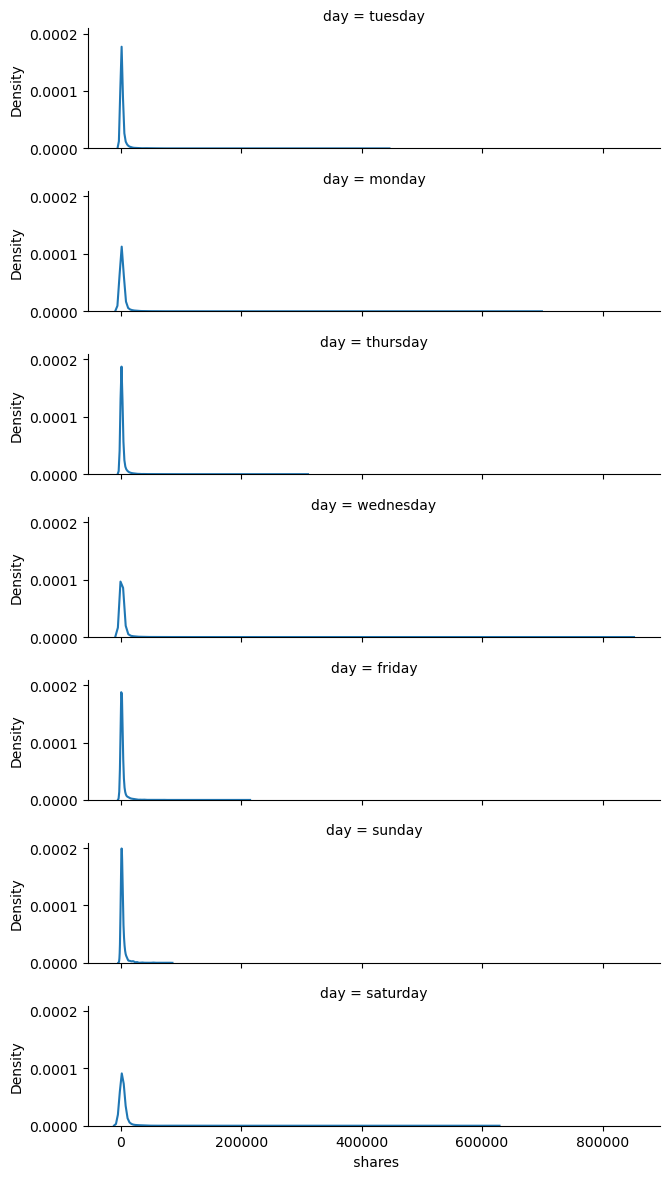

In [11]:
g = sns.FacetGrid(df, row="day", 
                  height=1.7, aspect=4,)
g.map(sns.kdeplot, " shares")

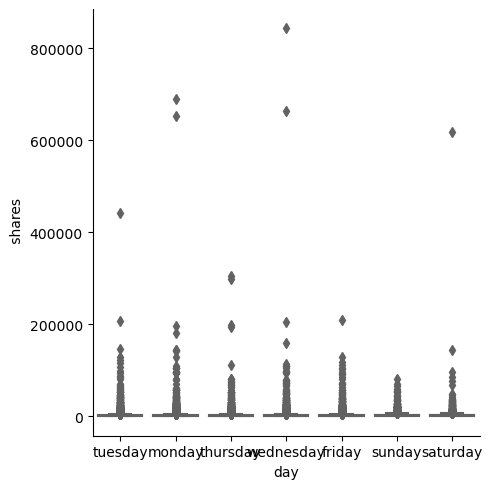

In [12]:
sns.catplot(data=df, x="day", y=" shares",kind="box", palette="Set3")

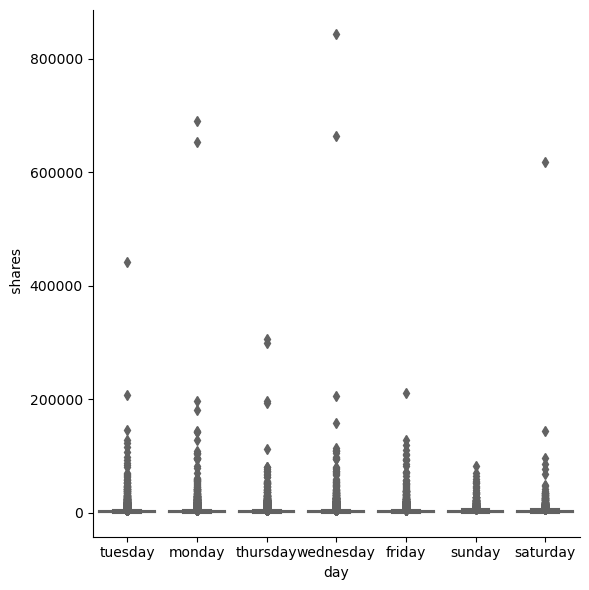

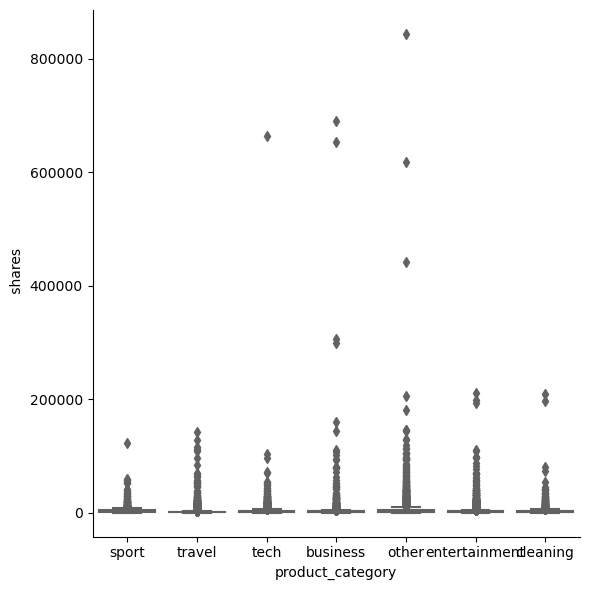

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

for i in df_categorical.columns:
    sns.catplot(data=df, x=i, y=" shares",
            kind="box", palette="Set3",height=6);
plt.show()



In [14]:
dummies = pd.get_dummies(df_categorical.astype(str),drop_first=True) 

dummies.tail()

day_monday  day_saturday  day_sunday  day_thursday  day_tuesday  \
27995           0             0           0             0            0   
27996           0             0           0             0            0   
27997           0             0           0             0            1   
27998           0             0           0             0            0   
27999           0             0           0             0            1   

       day_wednesday  product_category_cleaning  \
27995              1                          0   
27996              1                          0   
27997              0                          0   
27998              0                          0   
27999              0                          0   

       product_category_entertainment  product_category_other  \
27995                               0                       1   
27996                               0                       0   
27997                               1                       0   
27998                               0                       0   
27999                               0                       0   

       product_category_sport  product_category_tech  product_category_travel  
27995                       0                      0                        0  
27996                       0                      0                        0  
27997                       0                      0                        0  
27998                       0                      0                        1  
27999                       1                      0                        0

## Numerical data

array([[<AxesSubplot:title={'center':'age_days'}>,
        <AxesSubplot:title={'center':' n_tokens_title'}>,
        <AxesSubplot:title={'center':' n_tokens_review'}>,
        <AxesSubplot:title={'center':' n_unique_tokens'}>,
        <AxesSubplot:title={'center':' n_non_stop_words'}>,
        <AxesSubplot:title={'center':' n_non_stop_unique_tokens'}>,
        <AxesSubplot:title={'center':' num_hrefs'}>],
       [<AxesSubplot:title={'center':' num_self_hrefs'}>,
        <AxesSubplot:title={'center':' num_imgs'}>,
        <AxesSubplot:title={'center':' num_videos'}>,
        <AxesSubplot:title={'center':' average_token_length'}>,
        <AxesSubplot:title={'center':' num_keywords'}>,
        <AxesSubplot:title={'center':' kw_min_min'}>,
        <AxesSubplot:title={'center':' kw_max_min'}>],
       [<AxesSubplot:title={'center':' kw_avg_min'}>,
        <AxesSubplot:title={'center':' kw_min_max'}>,
        <AxesSubplot:title={'center':' kw_max_max'}>,
        <AxesSubplot:title={'center'

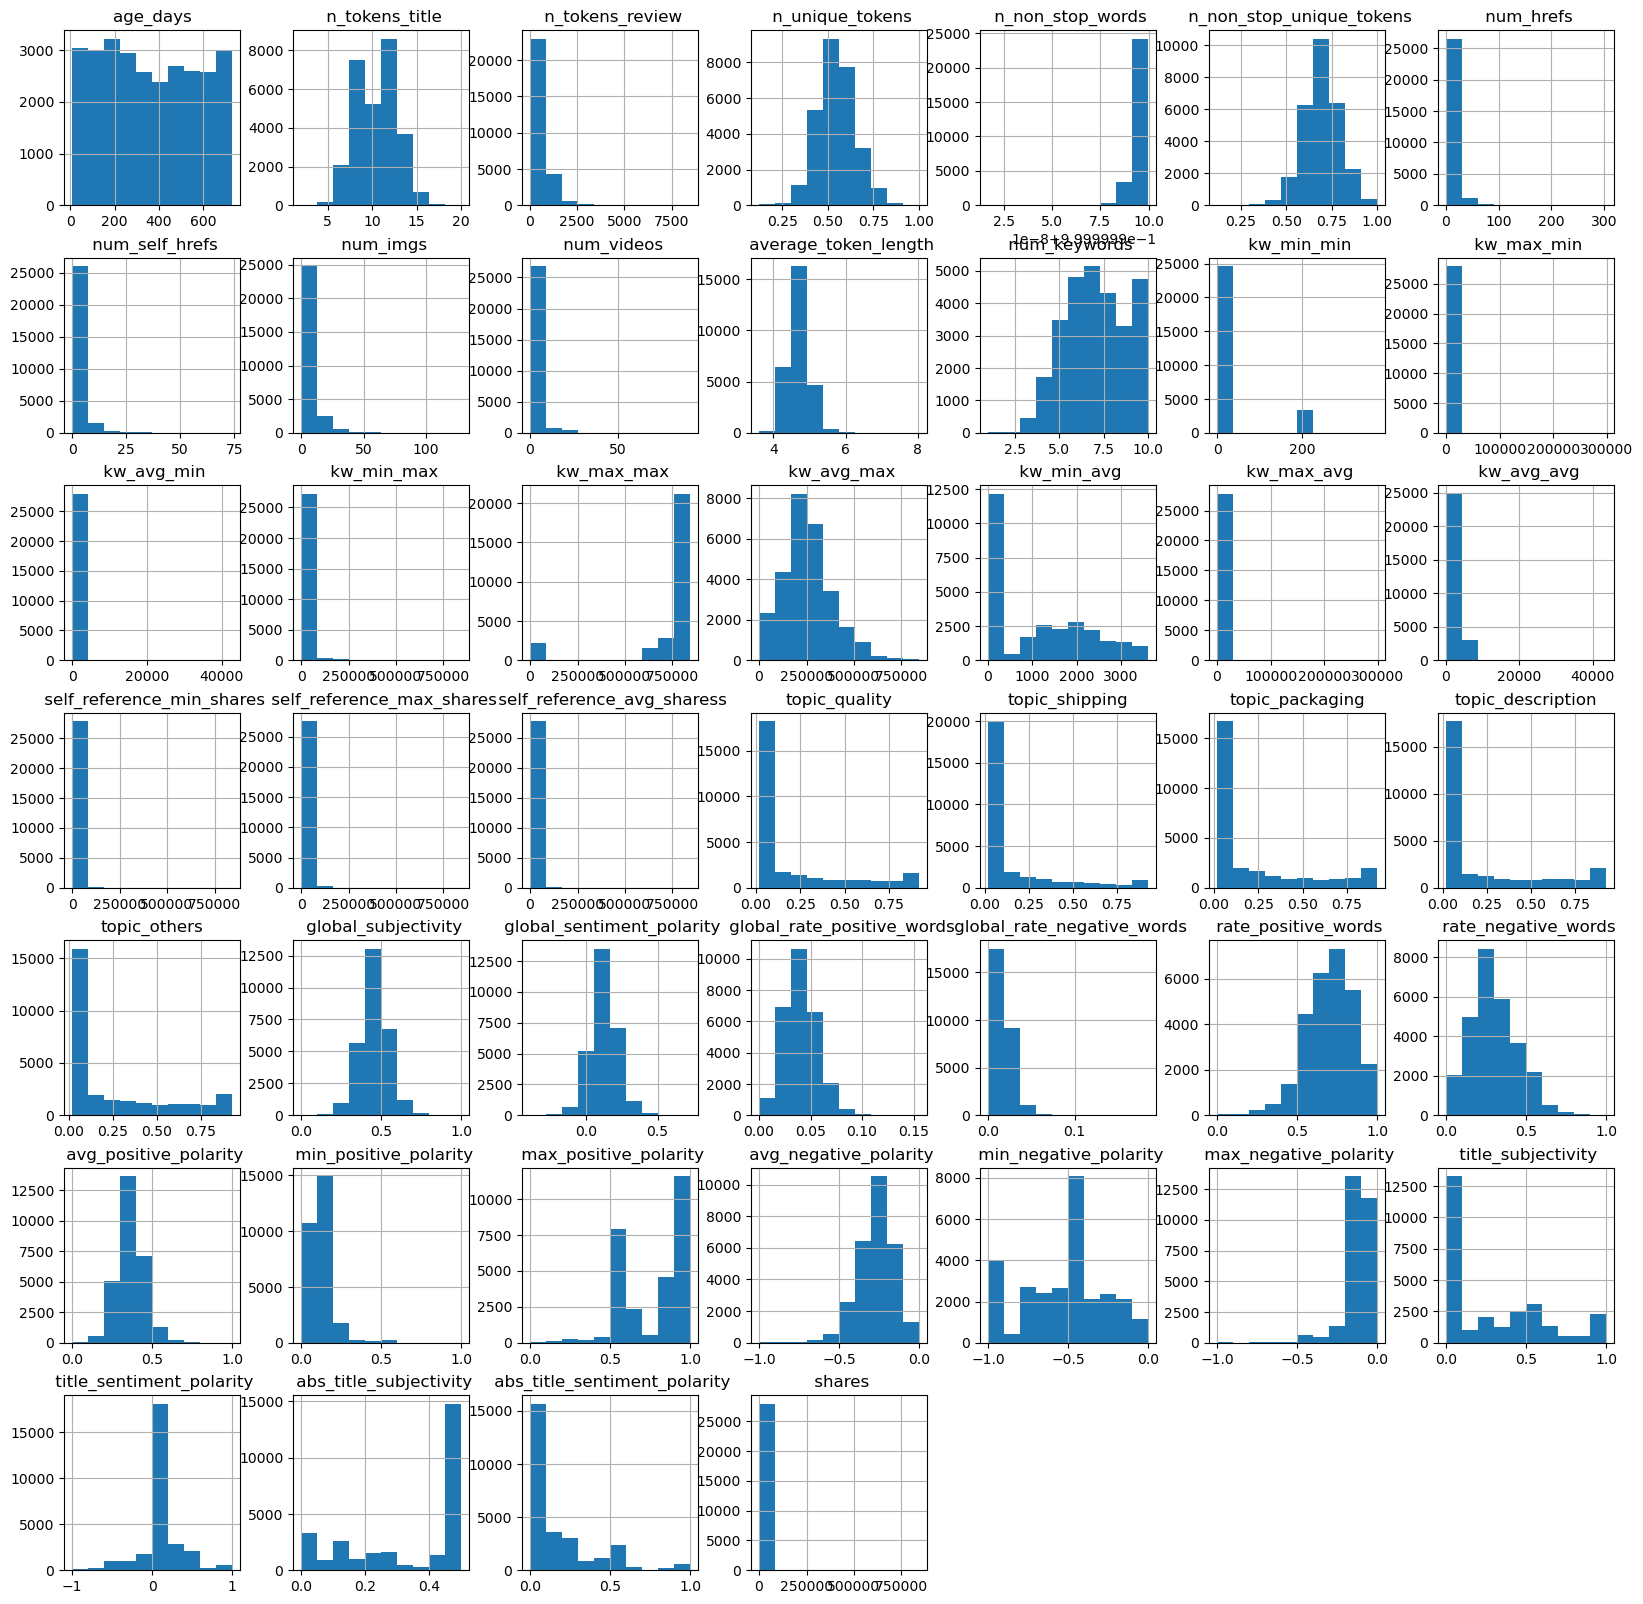

In [15]:
df_numerical.hist(figsize=(20,20))

In [16]:
import math
df_numerical['log_shares']=df_numerical[' shares'].apply(lambda x: math.log(x+1))

array([[<AxesSubplot:title={'center':'age_days'}>,
        <AxesSubplot:title={'center':' n_tokens_title'}>,
        <AxesSubplot:title={'center':' n_tokens_review'}>,
        <AxesSubplot:title={'center':' n_unique_tokens'}>,
        <AxesSubplot:title={'center':' n_non_stop_words'}>,
        <AxesSubplot:title={'center':' n_non_stop_unique_tokens'}>,
        <AxesSubplot:title={'center':' num_hrefs'}>],
       [<AxesSubplot:title={'center':' num_self_hrefs'}>,
        <AxesSubplot:title={'center':' num_imgs'}>,
        <AxesSubplot:title={'center':' num_videos'}>,
        <AxesSubplot:title={'center':' average_token_length'}>,
        <AxesSubplot:title={'center':' num_keywords'}>,
        <AxesSubplot:title={'center':' kw_min_min'}>,
        <AxesSubplot:title={'center':' kw_max_min'}>],
       [<AxesSubplot:title={'center':' kw_avg_min'}>,
        <AxesSubplot:title={'center':' kw_min_max'}>,
        <AxesSubplot:title={'center':' kw_max_max'}>,
        <AxesSubplot:title={'center'

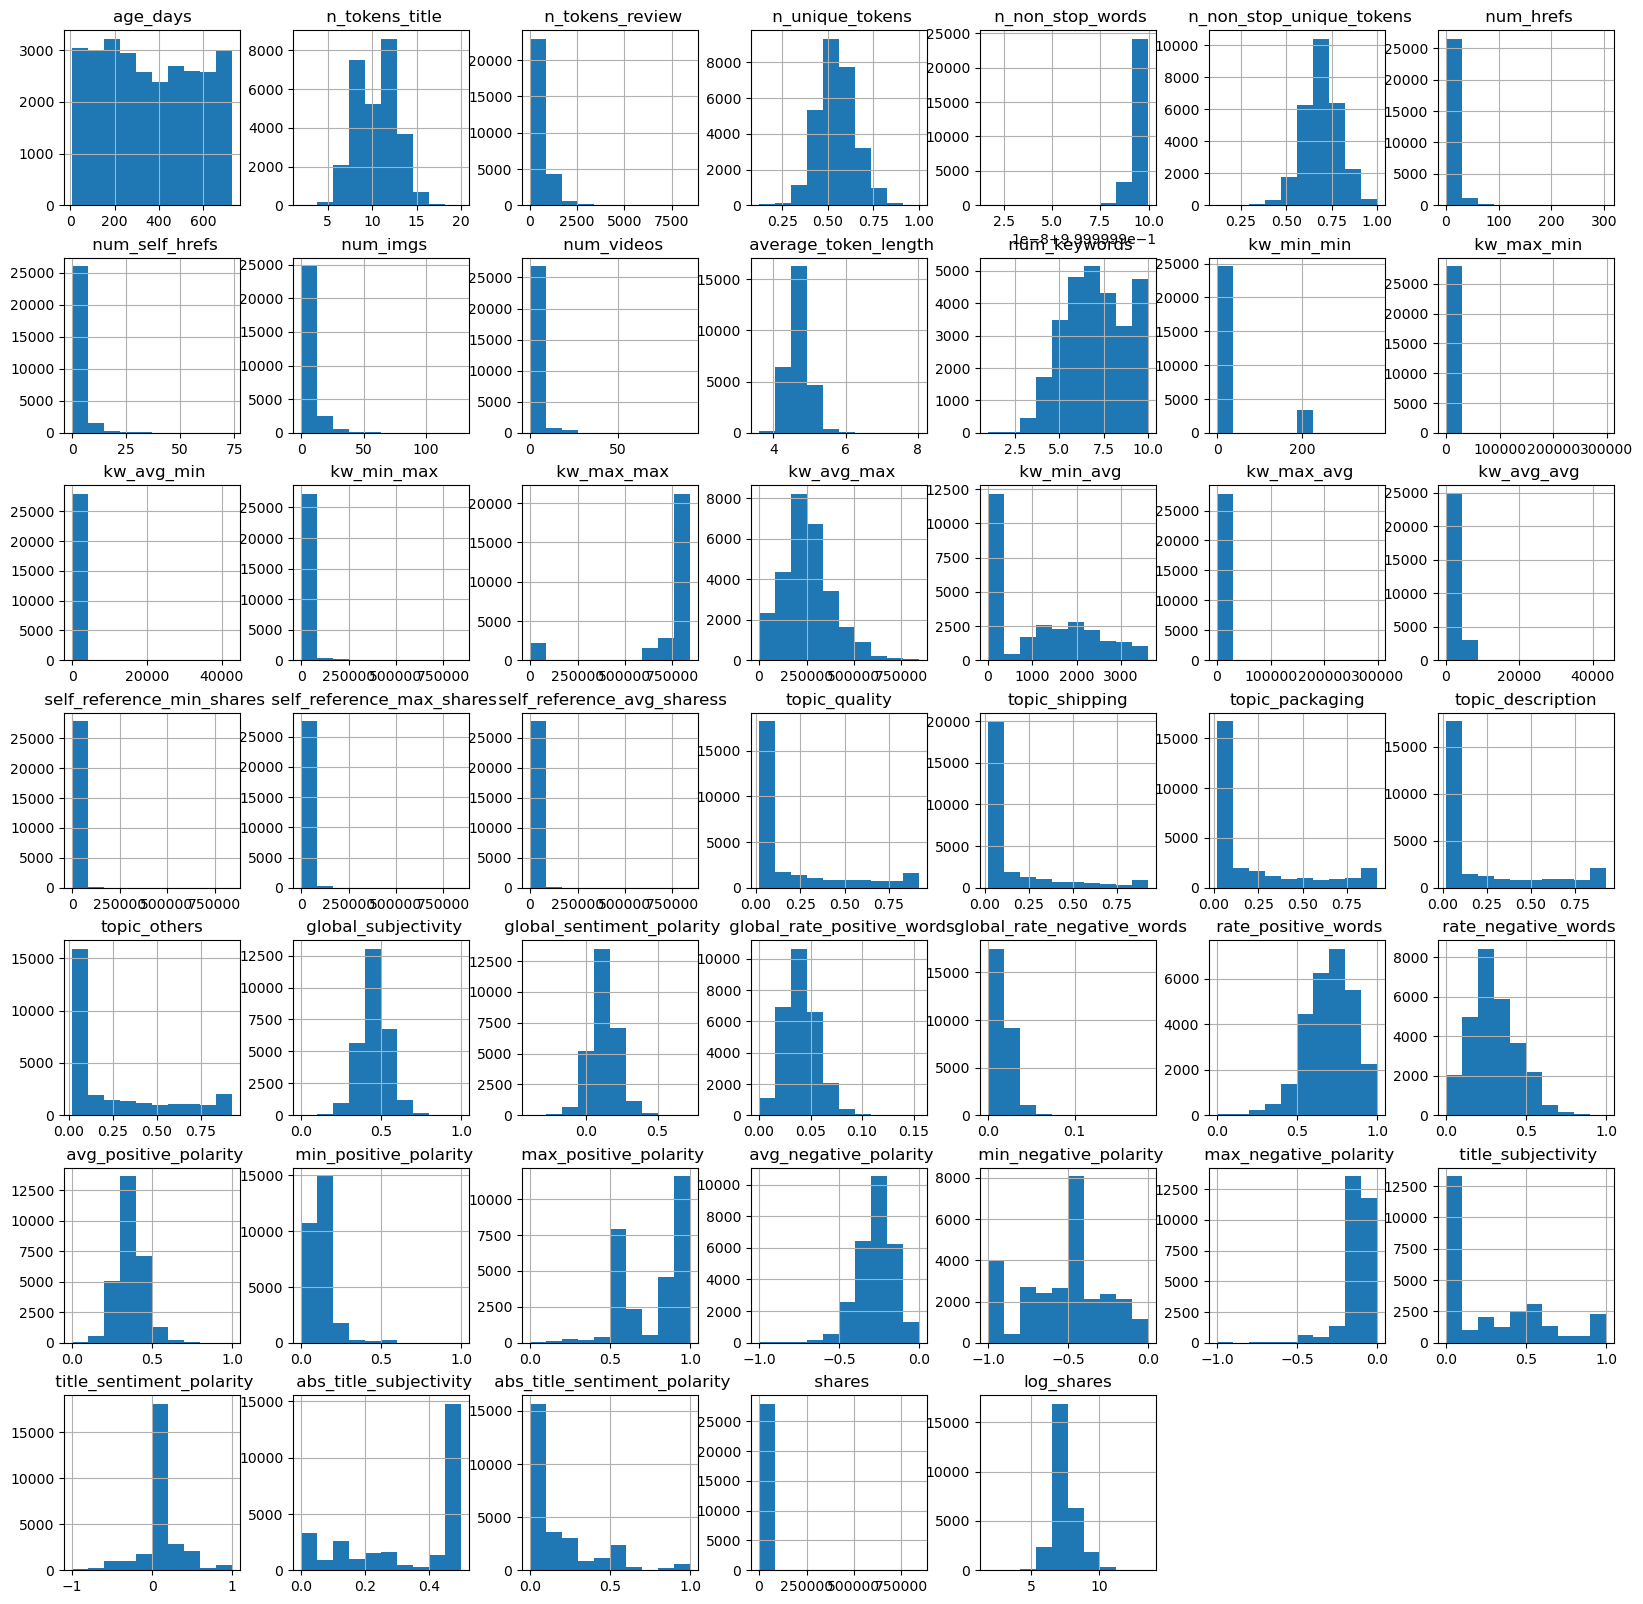

In [17]:
df_numerical.hist(figsize=(20,20))

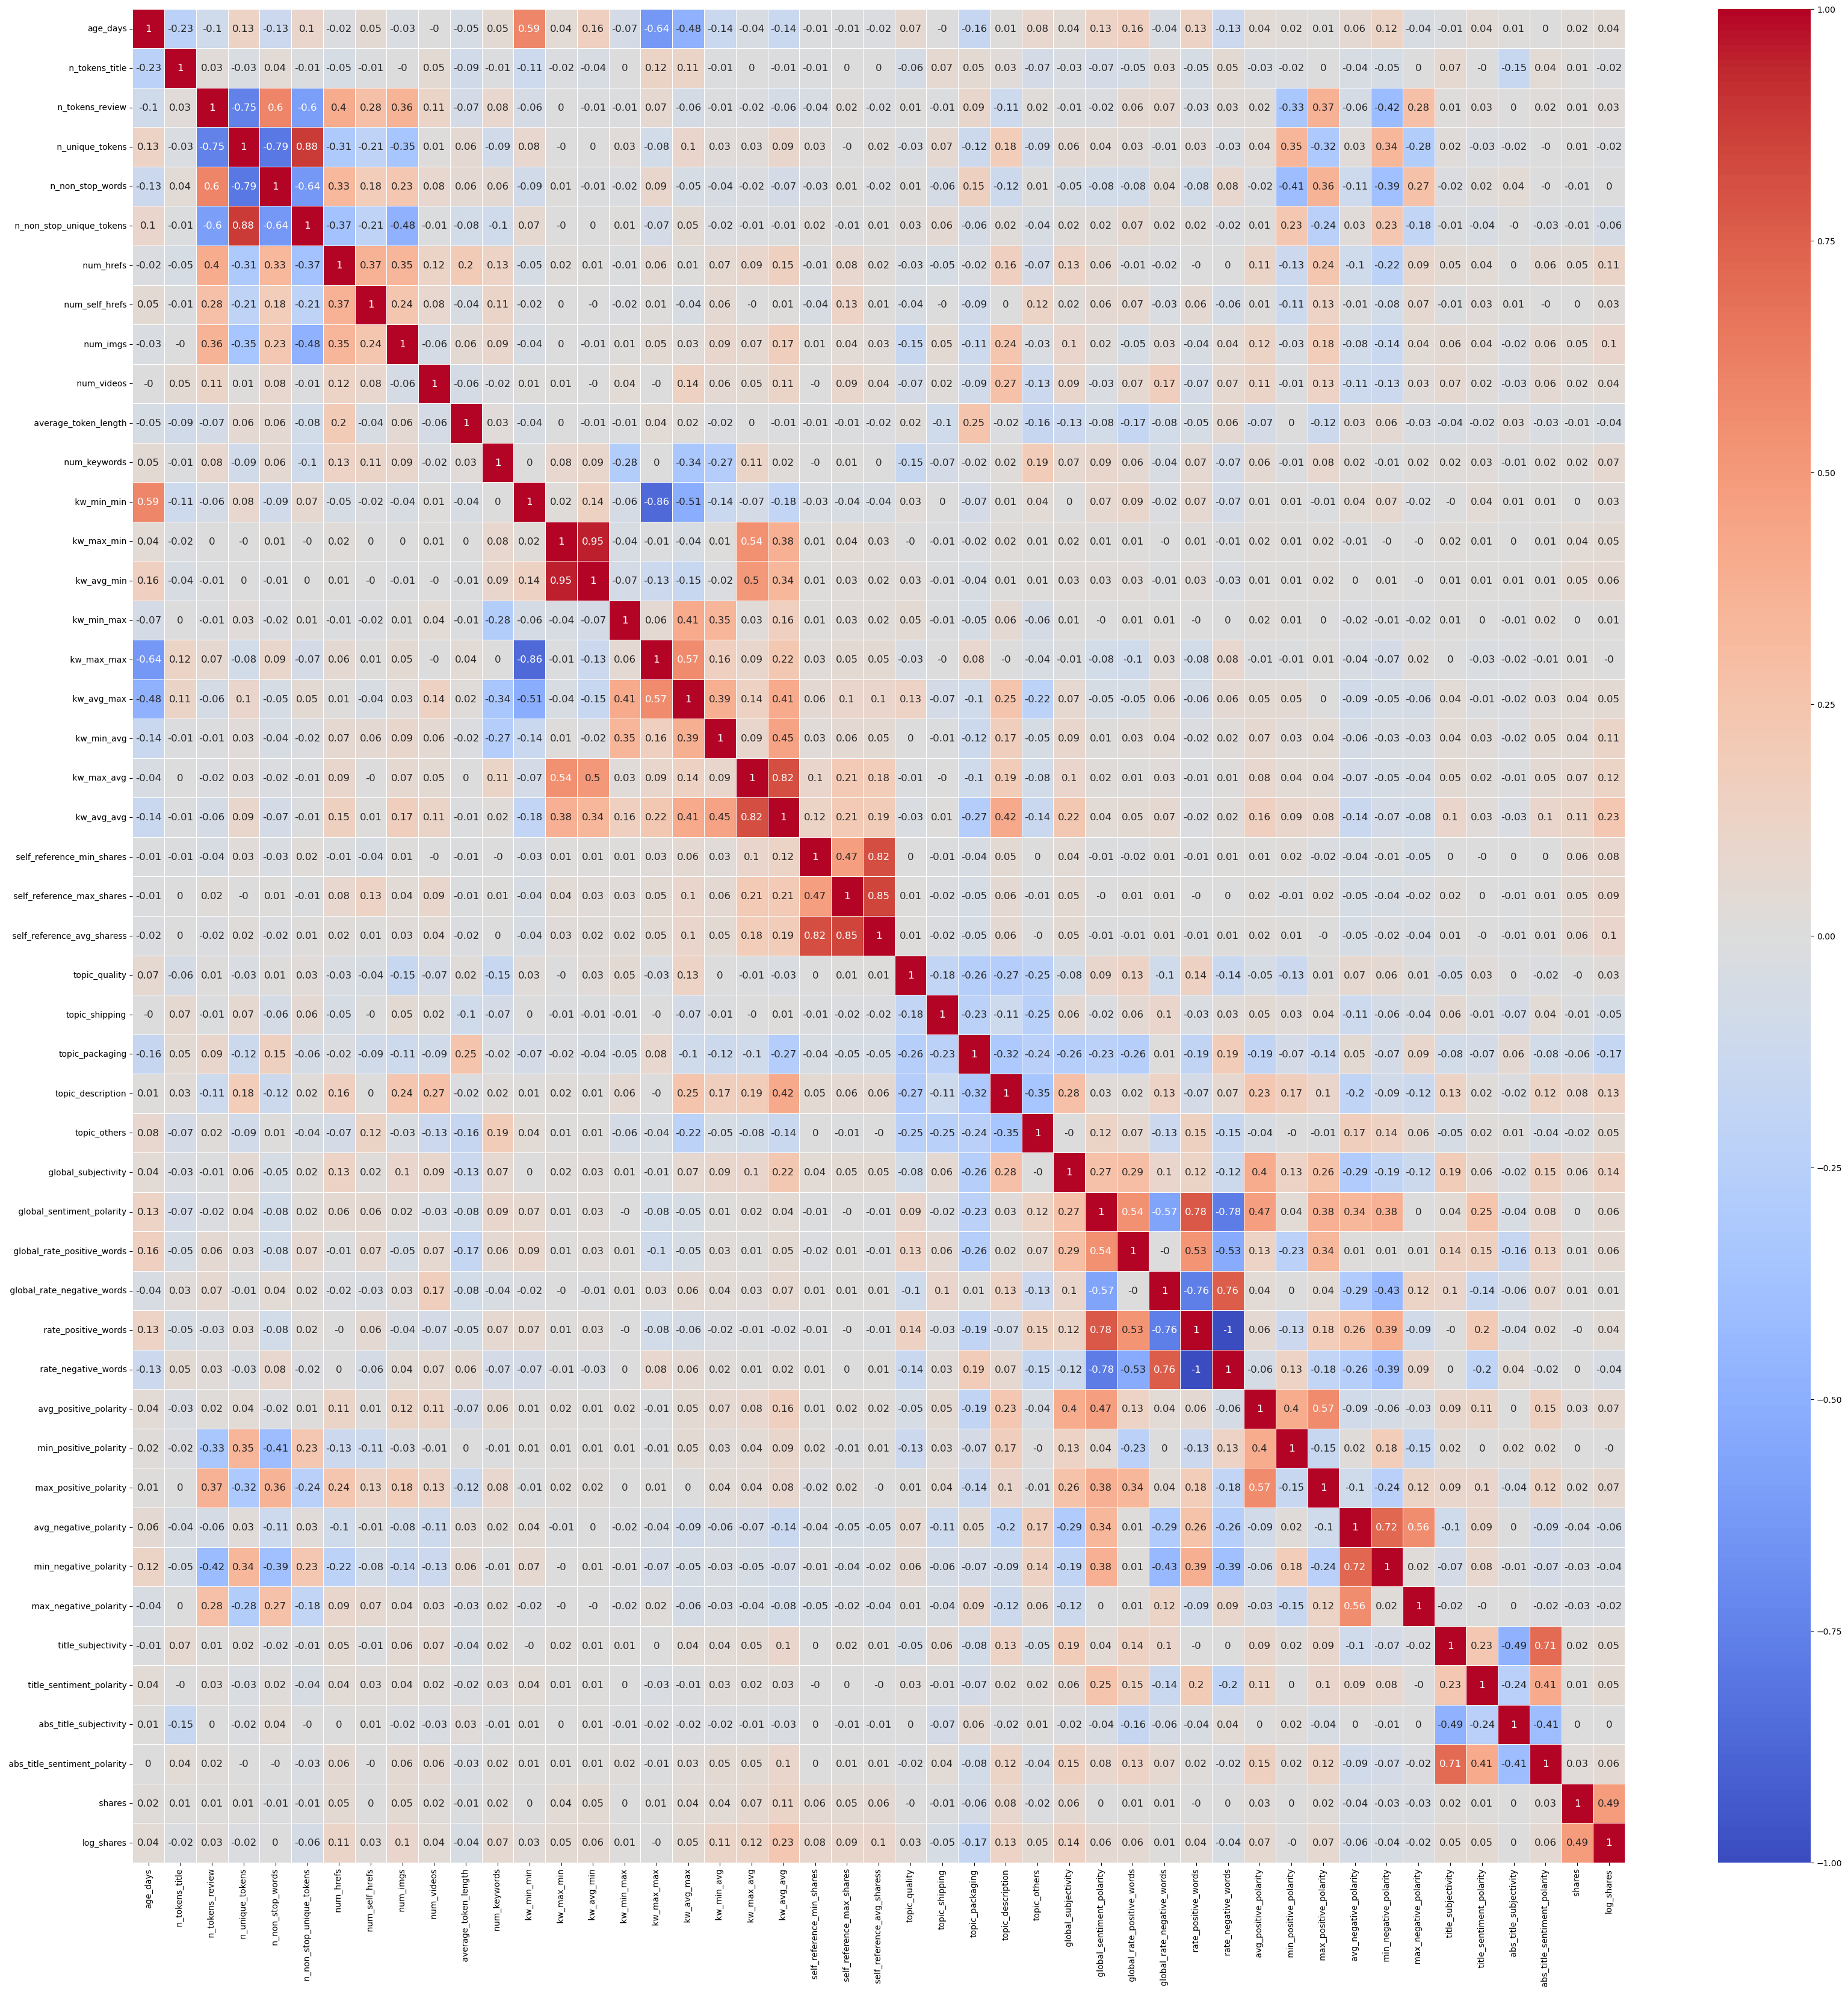

In [18]:
#We can visualise the correlation using a heatmap in Seaborn

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize = (40,40))
sns.heatmap(data=df_numerical.corr().round(2), cmap='coolwarm', linewidths=.5, annot=True, annot_kws={"size":12})
plt.show()

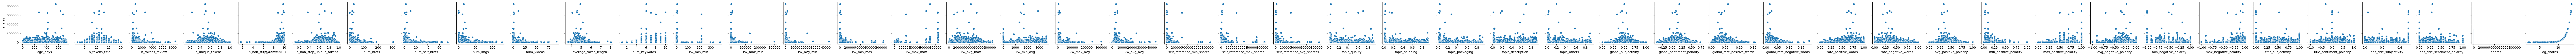

In [19]:
# visualize the relationship between the features and the response using scatterplots
%matplotlib inline
import seaborn as sns
sns.pairplot(df_numerical, x_vars=df_numerical.columns, y_vars=' shares')

In [20]:
X_numerical=df_numerical.iloc[:,:-2]

In [21]:
print(dummies.shape)
print(X_numerical.shape)

dummies.tail()

(28000, 12)
(28000, 45)


day_monday  day_saturday  day_sunday  day_thursday  day_tuesday  \
27995           0             0           0             0            0   
27996           0             0           0             0            0   
27997           0             0           0             0            1   
27998           0             0           0             0            0   
27999           0             0           0             0            1   

       day_wednesday  product_category_cleaning  \
27995              1                          0   
27996              1                          0   
27997              0                          0   
27998              0                          0   
27999              0                          0   

       product_category_entertainment  product_category_other  \
27995                               0                       1   
27996                               0                       0   
27997                               1                       0   
27998                               0                       0   
27999                               0                       0   

       product_category_sport  product_category_tech  product_category_travel  
27995                       0                      0                        0  
27996                       0                      0                        0  
27997                       0                      0                        0  
27998                       0                      0                        1  
27999                       1                      0                        0

In [22]:
X=pd.concat([dummies,X_numerical], axis = 1)
X.tail()

day_monday  day_saturday  day_sunday  day_thursday  day_tuesday  \
27995           0             0           0             0            0   
27996           0             0           0             0            0   
27997           0             0           0             0            1   
27998           0             0           0             0            0   
27999           0             0           0             0            1   

       day_wednesday  product_category_cleaning  \
27995              1                          0   
27996              1                          0   
27997              0                          0   
27998              0                          0   
27999              0                          0   

       product_category_entertainment  product_category_other  \
27995                               0                       1   
27996                               0                       0   
27997                               1                       0   
27998                               0                       0   
27999                               0                       0   

       product_category_sport  ...   avg_positive_polarity  \
27995                       0  ...                0.509524   
27996                       0  ...                0.342929   
27997                       0  ...                0.422991   
27998                       0  ...                0.308378   
27999                       1  ...                0.318747   

        min_positive_polarity   max_positive_polarity   avg_negative_polarity  \
27995                0.200000                     1.0               -0.333333   
27996                0.100000                     0.5               -0.622222   
27997                0.100000                     1.0               -0.404306   
27998                0.100000                     0.7               -0.288889   
27999                0.033333                     1.0               -0.128770   

        min_negative_polarity   max_negative_polarity   title_subjectivity  \
27995               -0.333333               -0.333333             0.000000   
27996               -1.000000               -0.166667             0.454545   
27997               -1.000000               -0.050000             0.000000   
27998               -0.900000               -0.100000             0.000000   
27999               -0.187500               -0.071429             0.727273   

        title_sentiment_polarity   abs_title_subjectivity  \
27995                   0.000000                 0.500000   
27996                   0.136364                 0.045455   
27997                   0.000000                 0.500000   
27998                   0.000000                 0.500000   
27999                   0.068182                 0.227273   

        abs_title_sentiment_polarity  
27995                       0.000000  
27996                       0.136364  
27997                       0.000000  
27998                       0.000000  
27999                       0.068182  

[5 rows x 57 columns]

In [23]:
X.columns

Index(['day_monday', 'day_saturday', 'day_sunday', 'day_thursday',
       'day_tuesday', 'day_wednesday', 'product_category_cleaning',
       'product_category_entertainment', 'product_category_other',
       'product_category_sport', 'product_category_tech',
       'product_category_travel', 'age_days', ' n_tokens_title',
       ' n_tokens_review', ' n_unique_tokens', ' n_non_stop_words',
       ' n_non_stop_unique_tokens', ' num_hrefs', ' num_self_hrefs',
       ' num_imgs', ' num_videos', ' average_token_length', ' num_keywords',
       ' kw_min_min', ' kw_max_min', ' kw_avg_min', ' kw_min_max',
       ' kw_max_max', ' kw_avg_max', ' kw_min_avg', ' kw_max_avg',
       ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       'topic_quality', 'topic_shipping', 'topic_packaging',
       'topic_description', 'topic_others', ' global_subjectivity',
       ' global_sentiment_polarity', ' global_rate_positive_words',
       ' g

In [24]:
df_numerical.drop(columns=[' n_non_stop_words'], inplace=True)
df_numerical.drop(columns=[' num_hrefs'], inplace=True)
df_numerical.drop(columns=[' num_self_hrefs'], inplace=True)
df_numerical.drop(columns=[' kw_min_min'], inplace=True)
df_numerical.drop(columns=[' kw_max_min'], inplace=True)
df_numerical.drop(columns=[' kw_avg_min'], inplace=True)
df_numerical.drop(columns=[' kw_min_max'], inplace=True)
df_numerical.drop(columns=[' kw_max_max'], inplace=True)
df_numerical.drop(columns=[' kw_max_avg'], inplace=True)
df_numerical.drop(columns=[' kw_avg_avg'], inplace=True)
df_numerical.drop(columns=[' self_reference_min_shares'], inplace=True)
df_numerical.drop(columns=[' self_reference_max_shares'], inplace=True)
df_numerical.drop(columns=[' self_reference_avg_sharess'], inplace=True)

In [25]:
df_numerical.head()

age_days   n_tokens_title   n_tokens_review   n_unique_tokens  \
0       436                9               532          0.462264   
1       185               16              1012          0.446247   
2       210               12               506          0.546559   
3       723               11               241          0.543933   
4       345               11               983          0.405930   

    n_non_stop_unique_tokens   num_imgs   num_videos   average_token_length  \
0                   0.594427          1            0               4.785714   
1                   0.638112          3           11               4.387352   
2                   0.693291          2            1               4.974308   
3                   0.648649          1            1               4.912863   
4                   0.594747          1            1               4.293998   

    num_keywords     kw_avg_max  ...   max_positive_polarity  \
0             10  116010.000000  ...                     1.0   
1              5  330720.000000  ...                     0.9   
2              7  218557.142857  ...                     0.5   
3              3   22233.333333  ...                     0.7   
4              8  150525.000000  ...                     1.0   

    avg_negative_polarity   min_negative_polarity   max_negative_polarity  \
0               -0.180556                   -0.25                  -0.125   
1               -0.318981                   -1.00                  -0.050   
2               -0.292708                   -0.75                  -0.100   
3                0.000000                    0.00                   0.000   
4               -0.256481                   -0.80                  -0.050   

    title_subjectivity   title_sentiment_polarity   abs_title_subjectivity  \
0                 0.50                      0.500                     0.00   
1                 0.05                     -0.075                     0.45   
2                 0.00                      0.000                     0.50   
3                 0.00                      0.000                     0.50   
4                 0.00                      0.000                     0.50   

    abs_title_sentiment_polarity   shares  log_shares  
0                          0.500     2200    7.696667  
1                          0.075      816    6.705639  
2                          0.000     1000    6.908755  
3                          0.000      660    6.493754  
4                          0.000     1000    6.908755  

[5 rows x 34 columns]

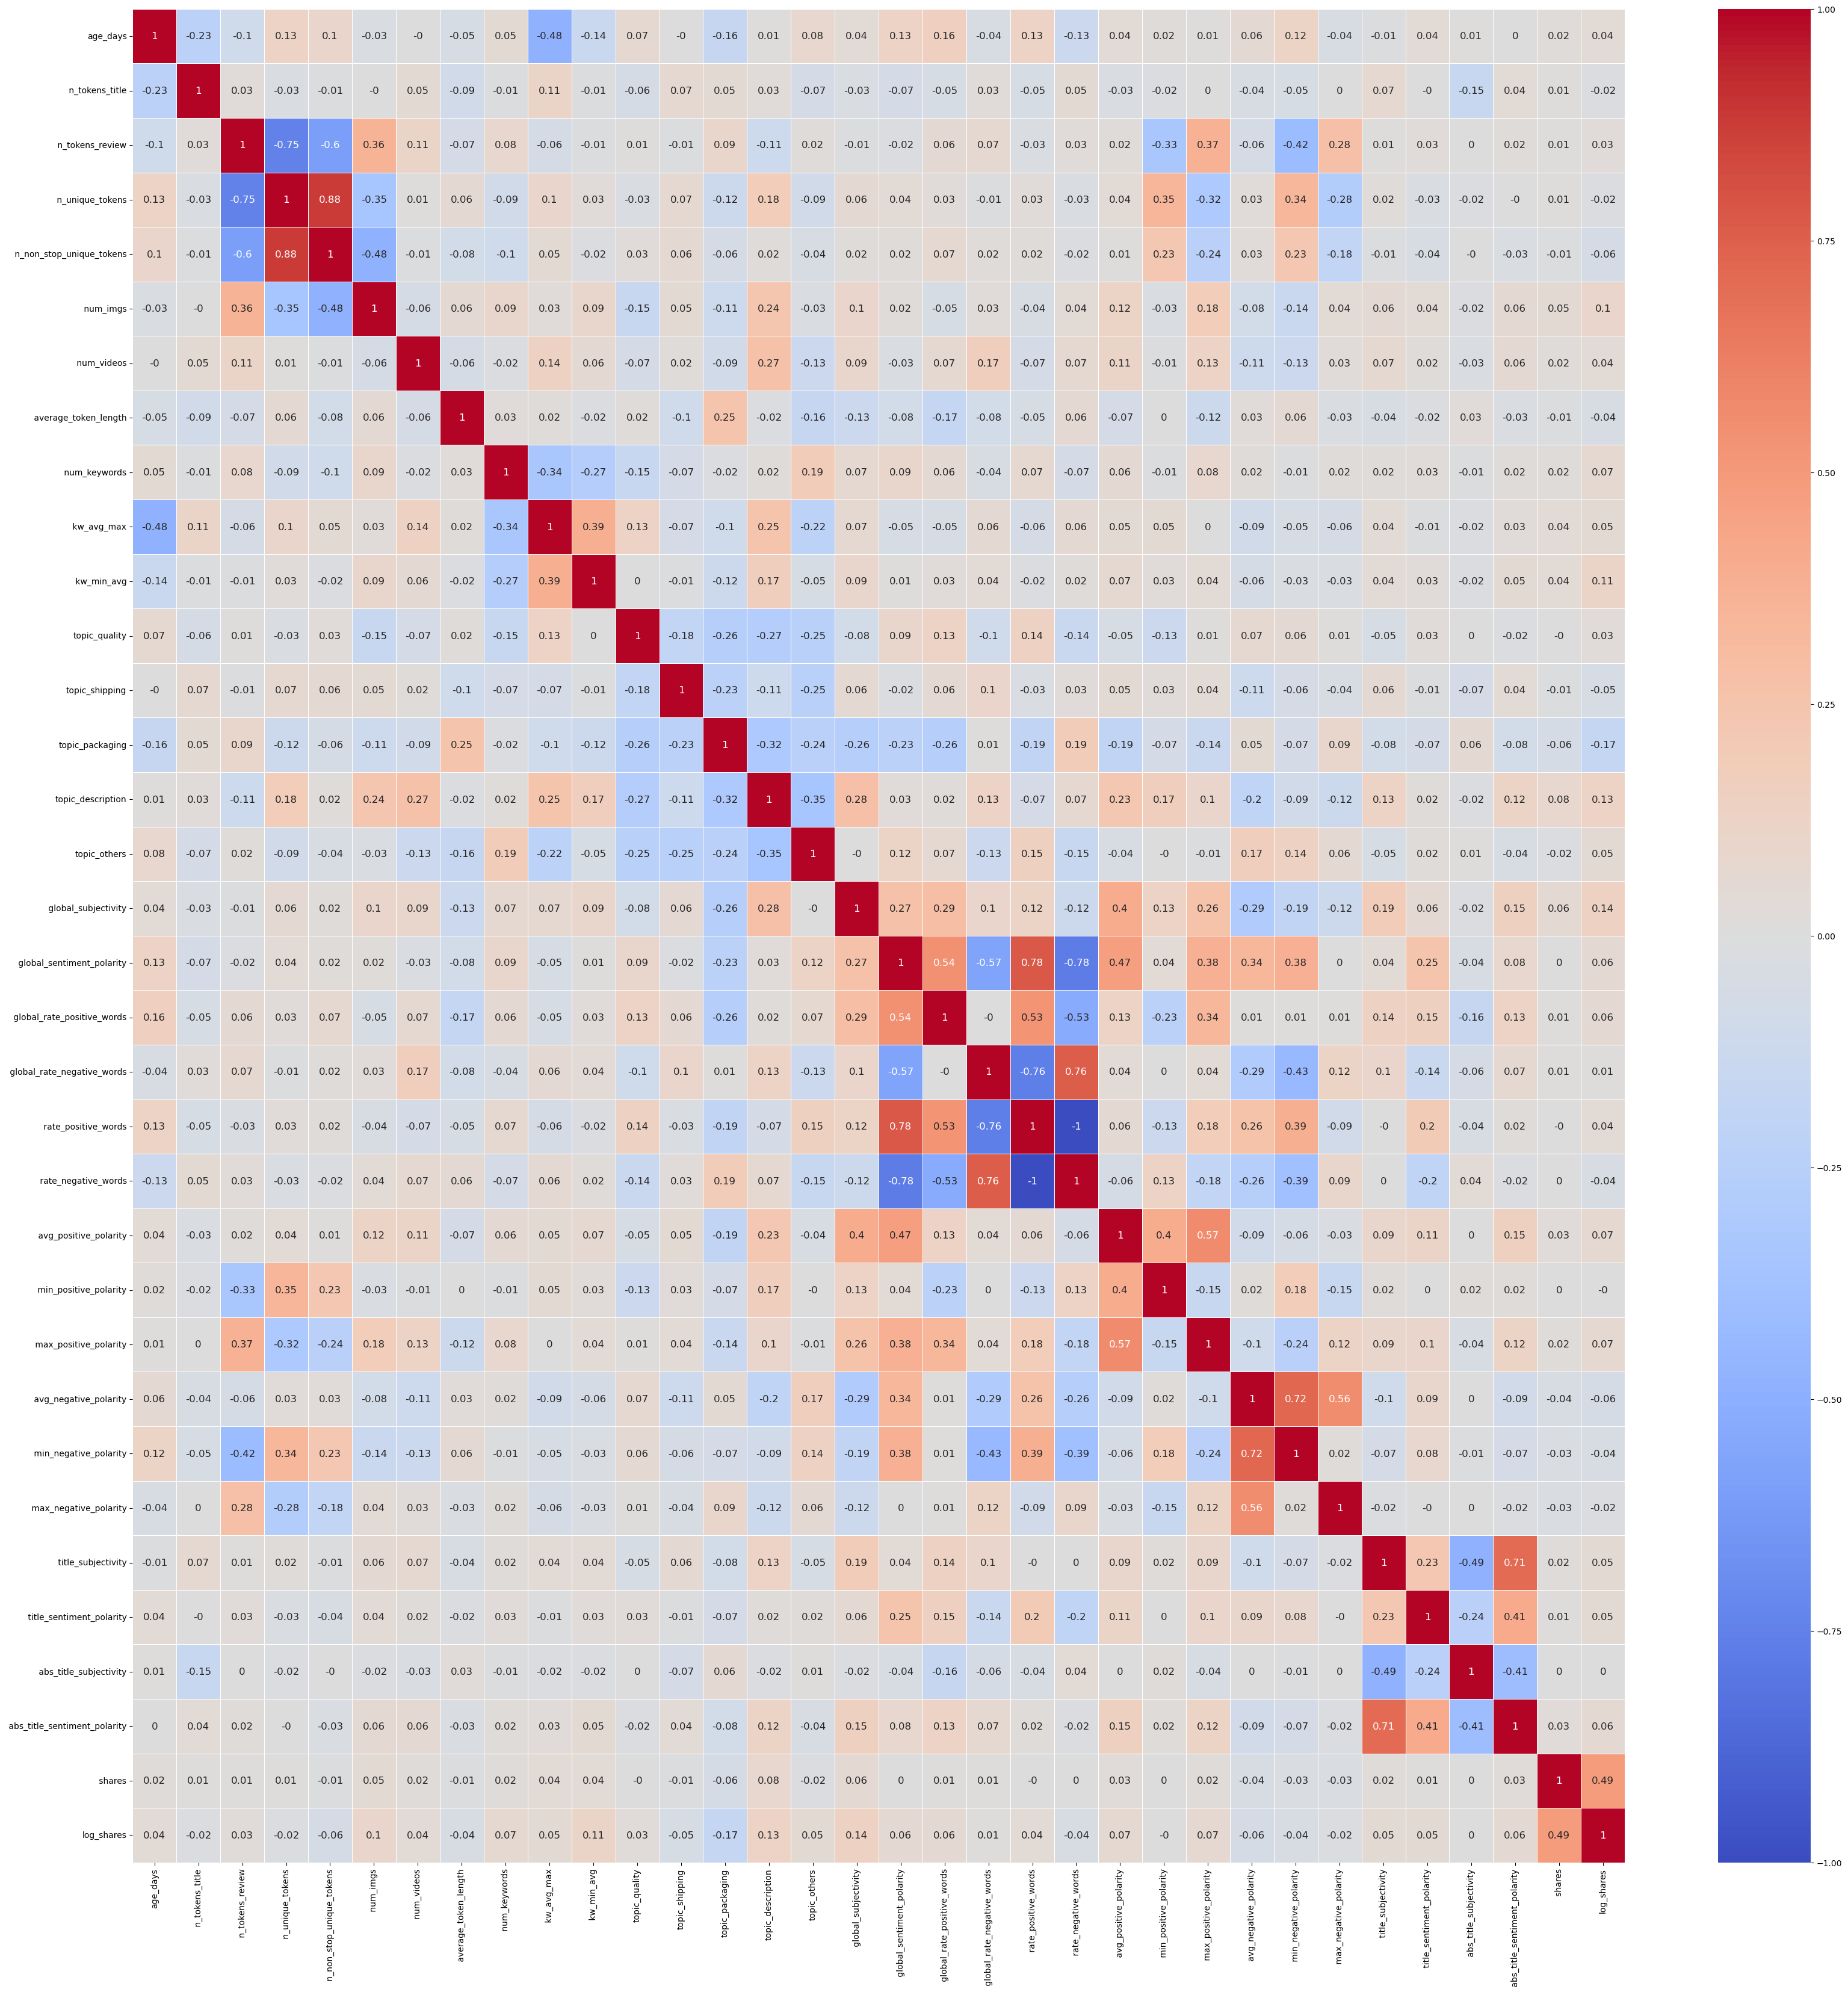

In [26]:
#We can visualise the correlation using a heatmap in Seaborn

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize = (40,40))
sns.heatmap(data=df_numerical.corr().round(2), cmap='coolwarm', linewidths=.5, annot=True, annot_kws={"size":12})
plt.show()

### Separate Train/Test sets


In [30]:
y=df[' shares'].apply(lambda x: math.log(x+1))

In [31]:
from sklearn.model_selection import train_test_split

#SPLIT DATA INTO TRAIN AND TEST SET
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size =0.25, #by default is 75%-25%
                                                    random_state= 123) #fix random seed for replicability

print(X_train.shape, X_test.shape)

(21000, 57) (7000, 57)


In [32]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)  
X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test) 

## Models

In [33]:
from sklearn.model_selection import GridSearchCV
import math

def gs_regression(model, par) :
    gs = GridSearchCV(model, par,cv=3,scoring ='neg_mean_absolute_error') 
    gs = gs.fit(X_train,y_train)

    #summarize the results of your GRIDSEARCH
    print('***GRIDSEARCH RESULTS***')
    print("Best score: %f using %s" % (gs.best_score_, gs.best_params_))
    means = gs.cv_results_['mean_test_score']
    stds = gs.cv_results_['std_test_score']
    params = gs.cv_results_['params']
    #for mean, stdev, param in zip(means, stds, params):
    #    print("%f (%f) with: %r" % (mean, stdev, param))
    
    y_pred_train=gs.predict(X_train)
    y_pred_test=gs.predict(X_test) 
    
    y_train_exp=y_train.apply(lambda x: math.exp(x)-1)
    y_test_exp=y_test.apply(lambda x: math.exp(x)-1)
    y_pred_train_exp=np.exp(y_pred_train)-1
    y_pred_test_exp=np.exp(y_pred_test)-1
    
            
    from sklearn import metrics
    print()
    print("MAE  train %.3f (%f)  test %.3f (%f)" % (metrics.mean_absolute_error(y_train, y_pred_train), metrics.mean_absolute_error(y_train_exp, y_pred_train_exp) ,metrics.mean_absolute_error(y_test, y_pred_test),  metrics.mean_absolute_error(y_test_exp, y_pred_test_exp)  ) )
    print("MSE  train %.3f              test %.3f" % (metrics.mean_squared_error(y_train, y_pred_train), metrics.mean_squared_error(y_test, y_pred_test)) ) 
    print("RMSE train %.3f              test %.3f" % (np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)), np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))) ) 
    print("r2   train %.3f              test %.3f" % (metrics.r2_score(y_train, y_pred_train), metrics.r2_score(y_test, y_pred_test)) )

In [34]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression() 
parameters = {}

gs_regression(regressor, parameters)

***GRIDSEARCH RESULTS***
Best score: -3732052.504042 using {}

MAE  train 0.638 (2431.725955)  test 0.634 (2369.128275)
MSE  train 0.740              test 0.746
RMSE train 0.861              test 0.864
r2   train 0.139              test 0.129


In [37]:
from sklearn.linear_model import Ridge

regressor = Ridge()
parameters = {"alpha": [0.001,0.01,0.1,1,10]}#, "normalize": [True, False]}

gs_regression(regressor, parameters)


***GRIDSEARCH RESULTS***
Best score: -0.639969 using {'alpha': 0.001}

MAE  train 0.638 (2431.714369)  test 0.634 (2369.133678)
MSE  train 0.740              test 0.746
RMSE train 0.861              test 0.864
r2   train 0.139              test 0.129


In [38]:
from sklearn.linear_model import Lasso

regressor = Lasso()
parameters = {"alpha": [0.001,0.01,0.1,1,10]}#, "normalize": [True, False]}

gs_regression(regressor, parameters)


***GRIDSEARCH RESULTS***
Best score: -0.639987 using {'alpha': 0.001}

MAE  train 0.638 (2430.693708)  test 0.634 (2368.113922)
MSE  train 0.741              test 0.746
RMSE train 0.861              test 0.864
r2   train 0.139              test 0.129


In [39]:
from sklearn.neighbors import KNeighborsRegressor

regressor = KNeighborsRegressor()

parameters = {'n_neighbors': np.arange(20,50,10),
              'p': [1,2]
            }

gs_regression(regressor, parameters)


***GRIDSEARCH RESULTS***
Best score: -0.631867 using {'n_neighbors': 40, 'p': 1}

MAE  train 0.614 (2370.941049)  test 0.624 (2350.440715)
MSE  train 0.716              test 0.758
RMSE train 0.846              test 0.871
r2   train 0.168              test 0.115


In [40]:
from sklearn.tree import DecisionTreeRegressor 

regressor = DecisionTreeRegressor()
parameters = {"max_depth": np.arange(1,18), 
              "min_samples_leaf": np.arange(5,8)}

gs_regression(regressor, parameters)


***GRIDSEARCH RESULTS***
Best score: -0.658876 using {'max_depth': 5, 'min_samples_leaf': 7}

MAE  train 0.644 (2422.254902)  test 0.653 (2418.650292)
MSE  train 0.744              test 0.779
RMSE train 0.862              test 0.882
r2   train 0.136              test 0.091


In [41]:
from sklearn.ensemble import RandomForestRegressor 

regressor = RandomForestRegressor()
parameters = {"n_estimators":[10,100,200,300], "criterion": ['mse'],  # squared_error
              "min_samples_leaf": [10,20,30,40], "random_state" : [42]}

gs_regression(regressor, parameters)


/Users/jacopobulgarelli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/jacopobulgarelli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/jacopobulgarelli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/jacopobulgarelli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


***GRIDSEARCH RESULTS***
Best score: -0.629770 using {'criterion': 'mse', 'min_samples_leaf': 10, 'n_estimators': 300, 'random_state': 42}

MAE  train 0.450 (2018.432834)  test 0.623 (2353.570419)
MSE  train 0.390              test 0.717
RMSE train 0.625              test 0.847
r2   train 0.547              test 0.163


In [31]:
from sklearn.neural_network import MLPRegressor

regressor = MLPRegressor(random_state=0)
parameters = {'hidden_layer_sizes': [(10, 5), (20,10,5)],
              'solver' : ['sgd'],
              'batch_size': [20],
              'learning_rate' : ['constant'],
              'alpha':10.0 ** -np.arange(1, 3),
              'max_iter':[5000]}

gs_regression(regressor, parameters)

***GRIDSEARCH RESULTS***
Best score: -0.632529 using {'alpha': 0.1, 'batch_size': 20, 'hidden_layer_sizes': (20, 10, 5), 'learning_rate': 'constant', 'max_iter': 5000, 'solver': 'sgd'}

MAE  train 0.605 (2349.913320)  test 0.622 (2350.856135)
MSE  train 0.678              test 0.735
RMSE train 0.824              test 0.857
r2   train 0.212              test 0.143


In [36]:
from sklearn.ensemble import AdaBoostRegressor

regressor = AdaBoostRegressor() # base_estimator=DecisionTreeRegressor(max_depth=3)
parameters = {"n_estimators":[5,10,100,300], "learning_rate":[0.001, 0.1,0.5,1,2], 
              "loss": ['linear', 'square'], "random_state" : [0]}

gs_regression(regressor, parameters)

KeyboardInterrupt: 

In [38]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV

# Define the AdaBoostRegressor
regressor = AdaBoostRegressor()

# Define the parameter grid
parameters = {
    "n_estimators": [5, 10, 100, 300],
    "learning_rate": [0.001, 0.1, 0.5, 1, 2],
    "loss": ['linear', 'square'],
    "random_state": [0]
}

# Initialize GridSearchCV with the regressor, parameter grid, and n_jobs=-1 for parallel processing
grid_search = GridSearchCV(estimator=regressor, param_grid=parameters, n_jobs=-1)

# Fit the grid search to your data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)


Best Parameters: {'learning_rate': 0.001, 'loss': 'linear', 'n_estimators': 300, 'random_state': 0}
Best Score: 0.10663388130507849


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

regressor = GradientBoostingRegressor() 
parameters = {"n_estimators":[20,50,100], "learning_rate":[0.01, 0.1,1,10], 
              "random_state" : [10] ,
             "max_depth":[1,2]}

gs_regression(regressor, parameters)

In [39]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

# Define the GradientBoostingRegressor
regressor = GradientBoostingRegressor()

# Define the parameter grid
parameters = {
    "n_estimators": [20, 50, 100],
    "learning_rate": [0.01, 0.1, 1, 10],
    "random_state": [10],
    "max_depth": [1, 2]
}

# Initialize GridSearchCV with the regressor, parameter grid, and n_jobs=-1 for parallel processing
grid_search = GridSearchCV(estimator=regressor, param_grid=parameters, n_jobs=-1)

# Fit the grid search to your data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)


/Users/jacopobulgarelli/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_search.py:978: RuntimeWarning: overflow encountered in square
  (array - array_means[:, np.newaxis]) ** 2, axis=1, weights=weights


Best Parameters: {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 100, 'random_state': 10}
Best Score: 0.1611129459513457


In [41]:
pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 23.4 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [52]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Assuming you have your data stored in X (features) and y (target variable)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the XGBoost regressor
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 15, alpha = 15, n_estimators = 1000)

# Train the model
xg_reg.fit(X_train,y_train)

# Make predictions
y_pred = xg_reg.predict(X_test)

# Calculate and print the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Calculate R-squared
r_squared = r2_score(y_test, y_pred)
print("R-squared:", r_squared)

Mean Squared Error: 0.7053752569814044
Mean Absolute Error: 0.6226375251347419
R-squared: 0.16541336148976538


In [53]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error

# Define a dictionary of parameters for hyperparameter tuning
param_grid = {
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'n_estimators' : [100, 200, 300]
}

# Instantiate the XGBoost regressor
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror')

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=xg_reg, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=1)

# Train the model
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Make predictions
y_pred = grid_search.predict(X_test)

# Calculate and print the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Calculate R-squared
r_squared = r2_score(y_test, y_pred)
print("R-squared:", r_squared)

Fitting 3 folds for each of 729 candidates, totalling 2187 fits
Best Parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 5, 'min_child_weight': 3, 'n_estimators': 200, 'subsample': 0.7}
Mean Squared Error: 0.6871295731295117
Mean Absolute Error: 0.6111758514918127
R-squared: 0.18700130890152578


## Choice of a model

In [ ]:
#retrain in the entire dataset

mlp = MLPRegressor(alpha=0.1, batch_size=20, hidden_layer_sizes=(20,10,5), learning_rate='constant', max_iter=5000, solver='sgd')
mlp.fit(X,y)

In [33]:
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from joblib import parallel_backend

# Define MLPRegressor with desired parameters
mlp = MLPRegressor(alpha=0.1, batch_size=20, hidden_layer_sizes=(20,10,5), learning_rate='constant', max_iter=5000, solver='sgd')

# Train the model with parallelization
with parallel_backend('threading', n_jobs=-1):
    mlp.fit(X_train, y_train)

In [34]:
y_pred=mlp.predict(X)
error=y-y_pred


/Users/jacopobulgarelli/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPRegressor was fitted without feature names
  warnings.warn(


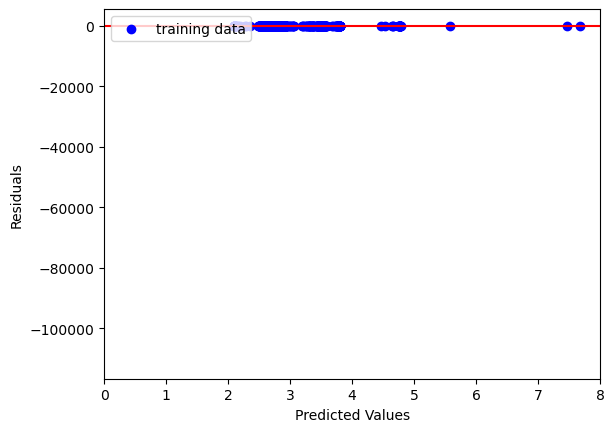

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(y_pred,error, c="b", label="training data")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.legend(loc="upper left")
plt.hlines(y=0, xmin=0, xmax=8, color="r")
plt.xlim([0,8])
plt.show()

In [36]:
#from sklearn.preprocessing import StandardScaler

#nb_error = np.array(error).flatten()

#error = np.array(error).reshape(-1,1)
#scaled_error= StandardScaler(copy=False).fit(error).transform(error).flatten()

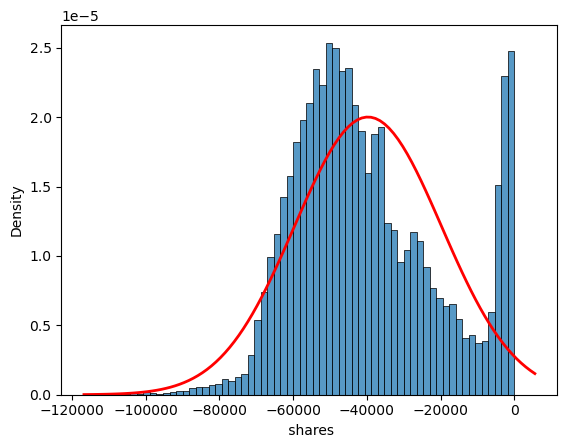

In [37]:
import numpy as np
import scipy 
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot_2samples
from matplotlib import pyplot as plt
import seaborn as sns

#dist = getattr(scipy.stats, 'norm')
#param = dist.fit(error)

err_mean=error.mean()
err_std=error.std()

# We generate a sample of size  len(mr_scaled) of data distributed according to distribution dist
# The function rvs generates a sample with distribution dist with mean loc and std scale
#test_dist = dist.rvs(*param[0:-2],loc=param[-2], scale=param[-1],size = len(error))


# plot the distribution and compare with a normal

ax = sns.histplot(error, stat='density')

# calculate the pdf
x0, x1 = ax.get_xlim()  # extract the endpoints for the x-axis
x_pdf = np.linspace(x0, x1, 100)
y_pdf = scipy.stats.norm.pdf(x_pdf, loc=err_mean, scale=err_std)

ax.plot(x_pdf, y_pdf, 'r', lw=2, label='normal')                                                   
#ax.legend() 

#plt.hist(nb_error,alpha=.3, density=True,bins='auto')
#plt.hist(test_dist,alpha=.3, density=True,bins='auto')
#plt.show()

In [38]:
import pickle
pickle.dump(mlp, open('mlp_model.pkl', 'wb'))

## Model Interpretation

In [39]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split

df_X_train=pd.DataFrame(X_train,columns=X.columns)


In [40]:
!pip install shap

  0%|          | 0/21000 [00:00<?, ?it/s]

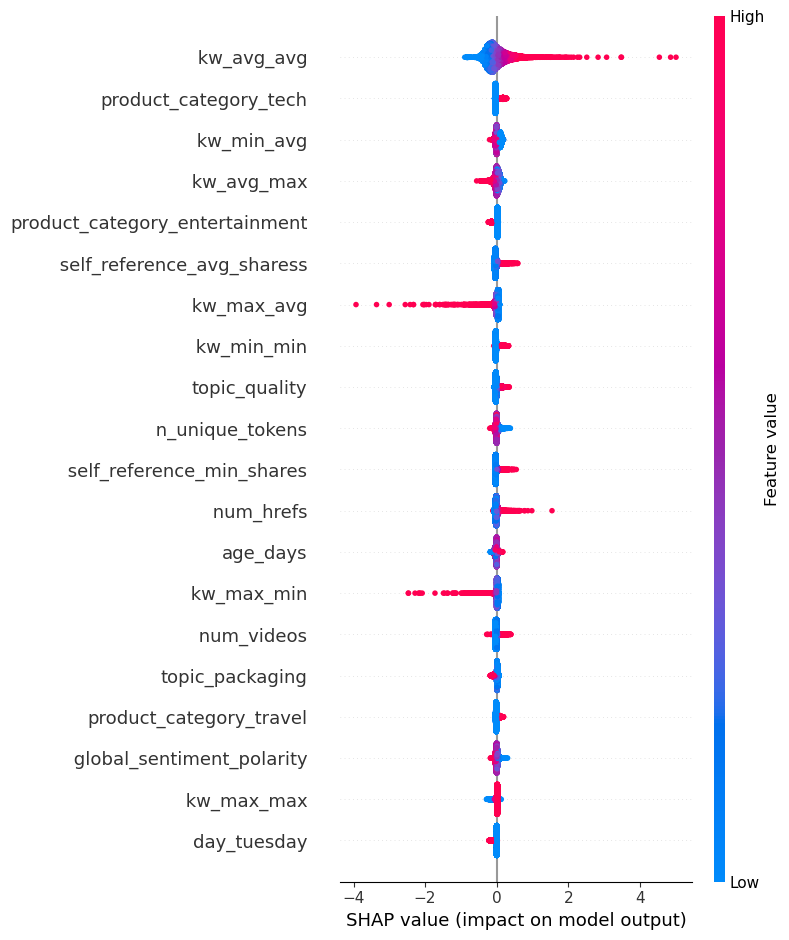

In [41]:
import shap

X_train_summary = shap.kmeans(X_train, 10)
# explain all the predictions in the test set
explainer = shap.KernelExplainer(mlp.predict, X_train_summary)
shap_values = explainer.shap_values(df_X_train)
shap.summary_plot(shap_values, df_X_train)

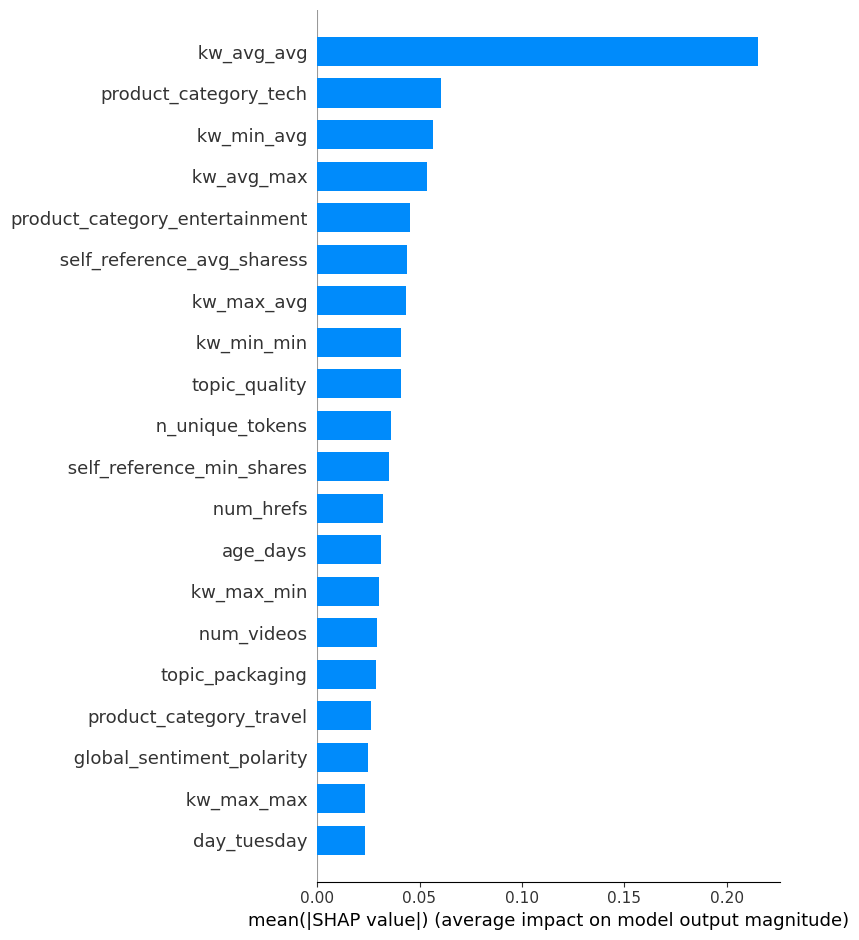

In [42]:
shap.summary_plot(shap_values, df_X_train, plot_type="bar")